## Criando a máscara

In [4]:
import cv2
import numpy as np

# Open image
img = cv2.imread('machado_burned.jpg')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Get width and height
rows, columns = gray.shape

# Change pixel color 
for row in range(rows):
    for col in range(columns):
        if gray[row, col] < 240:
            gray[row, col] = 0


# Show final image
cv2.imshow('Machado', gray)

# Wait to press '0' to close
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save final image
cv2.imwrite('machado_mask.jpg', gray)

True

## Analisando a frequência das palavras

In [47]:
from nltk.corpus import PlaintextCorpusReader
from collections import Counter
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import nltk
import string  
import re
import unicodedata

# Get all words
wordlists = PlaintextCorpusReader('machado', '.*', encoding='latin-1')
print(wordlists.fileids())

# Stopwords
stop_words_br = stopwords.words('portuguese')
stop_words_en = stopwords.words('english')


# Filter
long_long_text = ''  
filtered_sentence = [w.lower() for w in wordlists.words() 
                     if ((w.lower() not in stop_words_br) 
                        and (w not in string.punctuation) 
                        and (w.lower() not in stop_words_en) 
                        and (w.isnumeric() == False)
                        and (len(w)>=3)
                        and (w.lower() not in ['.»--«', ',--', 'elle', 'elles', 'ella', '--', '...',
                                              'ellas', 'dous', 'tal', 'della', 'delle', 'emfim',
                                              'alli']))]

final_text = ' '.join(filtered_sentence)

# Final Filter
for palavra in ['--', '_', '...', '.','-', 'capitulo', 'cousa']:
    final_text = final_text.replace(palavra, '')

final_text = final_text.replace(' s ', ' ')
final_text = final_text.replace('  ', ' ')

teste = word_tokenize(final_text)
print(Counter(teste).most_common())

# Frequency dictionary
dicitionario = {}
for k, v in teste:
    dicitionario[k] = v

['domcasmurro.txt', 'esauejacob.txt', 'historiassemdata.txt', 'maoealuva.txt', 'memorialdeayres.txt', 'memoriaspostumasbrascubas.txt', 'papeisavulsos.txt', 'poesiascompletas.txt', 'quincasborba.txt']
[('olhos', 1144), ('casa', 1038), ('tempo', 893), ('dia', 776), ('rubião', 699), ('vida', 677), ('homem', 658), ('dias', 618), ('mãe', 572), ('noite', 527), ('grande', 520), ('annos', 518), ('alma', 498), ('melhor', 494), ('rua', 492), ('amor', 476), ('verdade', 470), ('mim', 467), ('talvez', 439), ('mão', 435), ('moça', 421), ('coração', 411), ('marido', 410), ('deu', 398), ('sophia', 383), ('pae', 381), ('nunca', 380), ('tres', 370), ('palavras', 370), ('póde', 368), ('mulher', 368), ('mãos', 365), ('amigo', 360), ('cabeça', 355), ('certo', 351), ('sei', 348), ('fim', 347), ('gente', 343), ('capitú', 341), ('vezes', 338), ('dizia', 336), ('parece', 331), ('maria', 331), ('primeiro', 318), ('tarde', 315), ('porta', 311), ('nome', 307), ('primeira', 301), ('horas', 300), ('filha', 298), ('

ValueError: too many values to unpack (expected 2)

## Word Cloud

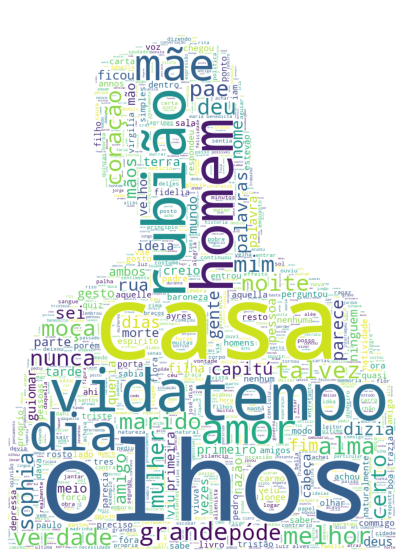

<Figure size 432x288 with 0 Axes>

In [49]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import numpy as np
from PIL import Image

# Máscara
machado_mask = np.array(Image.open("machado_mask.jpg"))

#---WITHOUT MASK---
# wordcloud = WordCloud(width = 1500, height = 800, 
#                 background_color ='white', 
#                 min_font_size = 10).generate(final_text) 


# Create word cloud - plural is omitted
wordcloud = WordCloud(background_color="white", max_words=2000, 
                      mask=machado_mask, normalize_plurals = False).generate(final_text) 

# Create word cloud - using frequency dictionary
#wordcloud = WordCloud(background_color="white", max_words=2000, mask=machado_mask).generate_from_frequencies(dicitionario) 


#---WITHOUT MASK---
# plt.figure(figsize = (15, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 

# Save output
wordcloud.to_file("machado_wordcloud.jpg")

# show
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.figure()
plt.show()